In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [ ]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear

        self.fc = torch.nn.Linear(784, 3)



        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function

        outputs = self.fc(x)

        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear

        self.fc1 = torch.nn.Linear(784, 400)
        self.fc2 = torch.nn.Linear(400, 3)


        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function

        x = torch.sigmoid(self.fc1(x))
        outputs = self.fc2(x)


        ### ========== TODO : END ========== ###
        return outputs

In [ ]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [ ]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [ ]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

    return total_loss / len(dataloader)

In [ ]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()

    return total_acc / len(dataloader.dataset)

In [ ]:
def train(model, criterion, optimizer, train_loader, valid_loader, epochs=31):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            pass
            ### ========== TODO : START ========== ###
            ### part f: implement the training process

            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()




            ### ========== TODO : END ========== ###

        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Label: 1
Label: 0
Label: 2
Data preparation...
(300, 784) (150, 784)
Start training OneLayerNetwork...
| epoch  1 | train loss 1.075380 | train acc 0.453333 | valid loss 1.084895 | valid acc 0.453333 |
| epoch  2 | train loss 1.021195 | train acc 0.553333 | valid loss 1.030888 | valid acc 0.553333 |
| epoch  3 | train loss 0.972527 | train acc 0.626667 | valid loss 0.982578 | valid acc 0.593333 |
| epoch  4 | train loss 0.928296 | train acc 0.710000 | valid loss 0.938814 | valid acc 0.640000 |
| epoch  5 | train loss 0.887846 | train acc 0.783333 | valid loss 0.898887 | valid acc 0.700000 |
| epoch  6 | train loss 0.850737 | train acc 0.826667 | valid loss 0.862347 | valid acc 0.753333 |
| epoch  7 | train loss 0.816550 | train acc 0.850000 | valid loss 0.828748 | valid acc 0.793333 |
| epoch  8 | train loss 0.784934 | train acc 0.886667 | valid loss 0.797719 | valid acc 0.846667 |
| epoch  9 | train loss 0.755629 | train acc 0.896667 | valid loss 0.768988 | valid acc 0.866667 |
| epoc

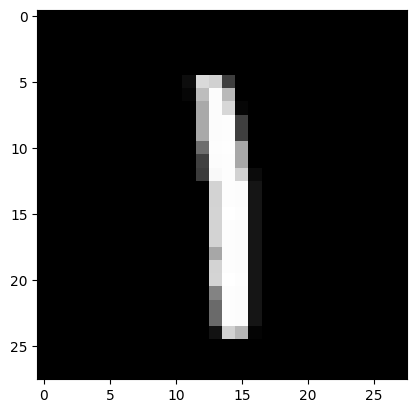

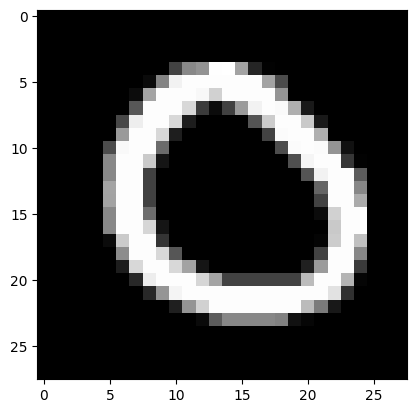

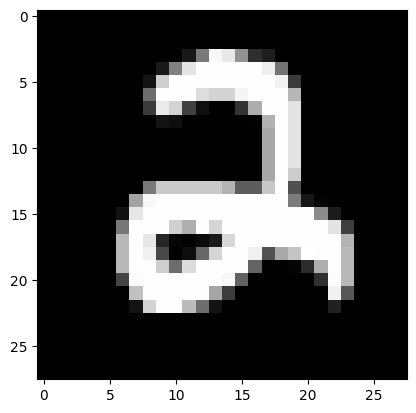

In [ ]:
######################################################################
# main
######################################################################

# def main():

# fix random seed
np.random.seed(0)
torch.manual_seed(0)

# load data with correct file path

### ========== TODO : START ========== ###
data_directory_path =  "/content/drive/My Drive/cm146/pset3"
### ========== TODO : END ========== ###

# X.shape = (n_examples, n_features)
# y.shape = (n_examples, )
X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

### ========== TODO : START ========== ###
### part a: print out three training images with different labels

unique_labels = set()
images_plotted = 0
for i in range(len(y_train)):
    if y_train[i] not in unique_labels:
        unique_labels.add(y_train[i])
        print(f"Label: {y_train[i]}")
        plot_img(X_train[i])
        images_plotted += 1
    if images_plotted >= 3:
        break

### ========== TODO : END ========== ###

print("Data preparation...")
print(X_train.shape, X_test.shape)

### ========== TODO : START ========== ###
### part b: convert numpy arrays to tensors

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part c: prepare dataloaders for training, validation, and testing
###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
### train_loader = ...
### valid_loader = ...
### test_loader = ...

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part e: prepare OneLayerNetwork, criterion, and optimizer
model_one = OneLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_one.parameters(), lr=0.0005)

### ========== TODO : END ========== ###

print("Start training OneLayerNetwork...")
results_one = train(model_one, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

### ========== TODO : START ========== ###
### part h: prepare TwoLayerNetwork, criterion, and optimizer

model_two = TwoLayerNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_two.parameters(), lr=0.0005)


### ========== TODO : END ========== ###

print("Start training TwoLayerNetwork...")
results_two = train(model_two, criterion, optimizer, train_loader, valid_loader, epochs=31)
print("Done!")

one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

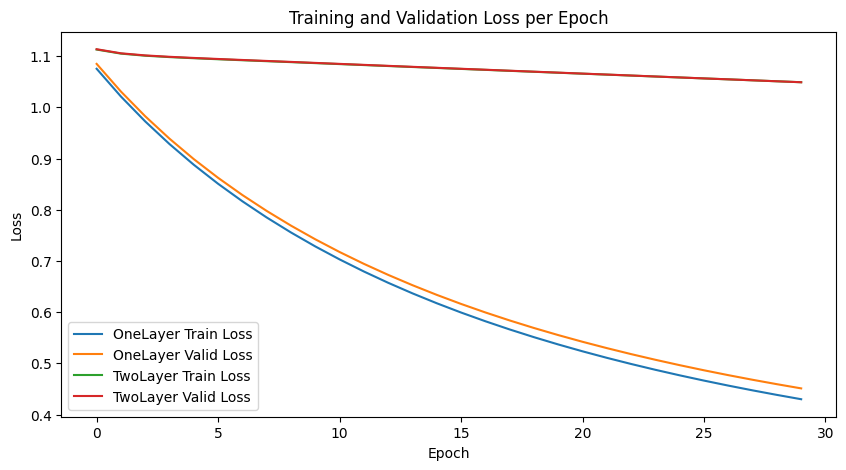

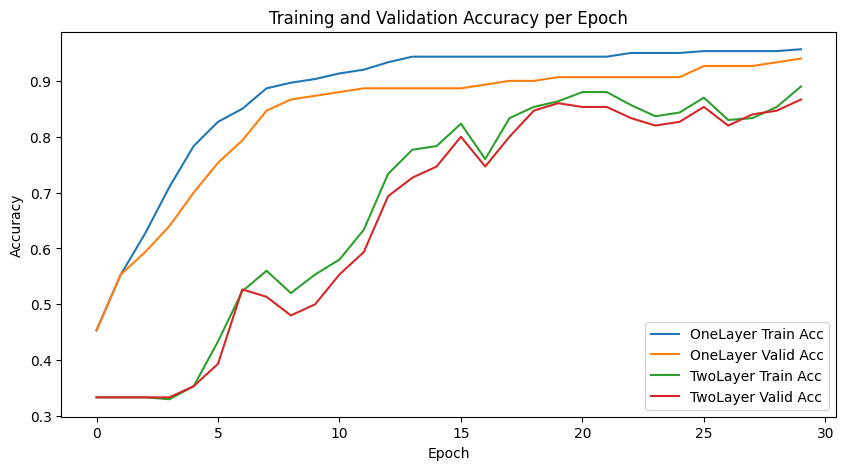

Test Accuracy - OneLayerNetwork: 0.960000
Test Accuracy - TwoLayerNetwork: 0.893333
To improve the performance of the two-layer network, one might adjust the learning rate, increase the hidden layer size, add more layers, experiment with other activation functions, or add regularization techniques such as dropout.
Start training TwoLayerNetwork with Adam optimizer...
| epoch  1 | train loss 0.503574 | train acc 0.933333 | valid loss 0.509759 | valid acc 0.913333 |
| epoch  2 | train loss 0.282001 | train acc 0.943333 | valid loss 0.297601 | valid acc 0.946667 |
| epoch  3 | train loss 0.186277 | train acc 0.986667 | valid loss 0.214434 | valid acc 0.953333 |
| epoch  4 | train loss 0.131836 | train acc 0.976667 | valid loss 0.162984 | valid acc 0.960000 |
| epoch  5 | train loss 0.101648 | train acc 0.983333 | valid loss 0.139867 | valid acc 0.966667 |
| epoch  6 | train loss 0.081196 | train acc 0.986667 | valid loss 0.123078 | valid acc 0.966667 |
| epoch  7 | train loss 0.066404 | t

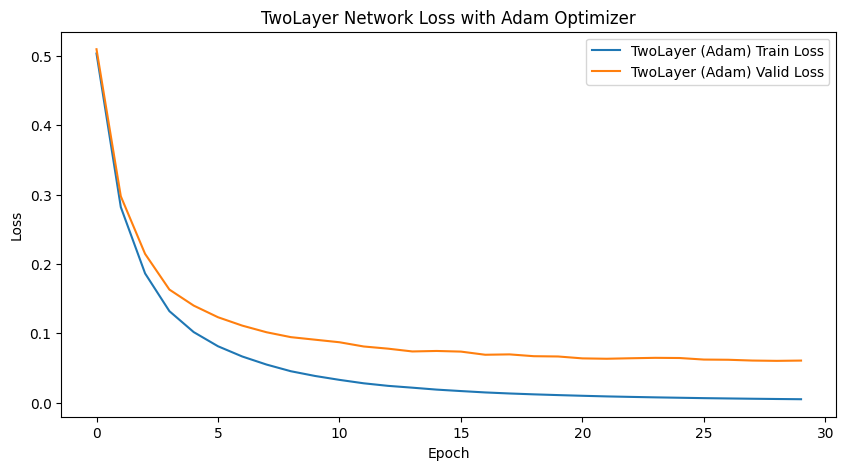

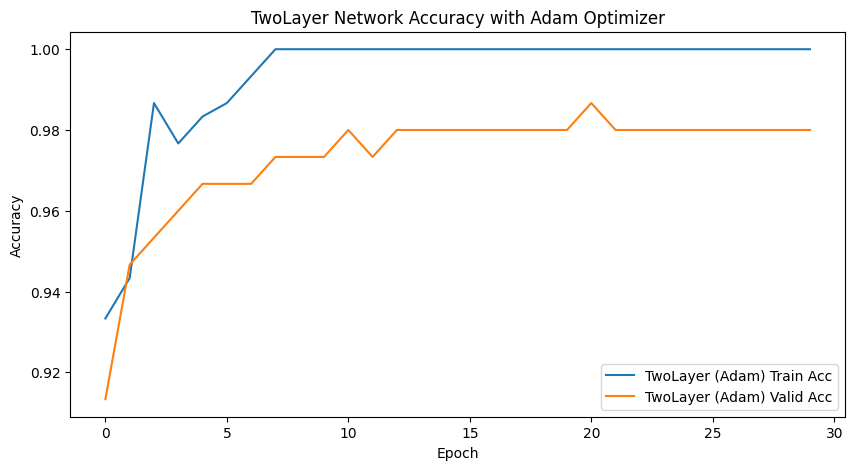

Test Accuracy - TwoLayerNetwork with Adam: 0.966667
Observations: Adam often leads to faster convergence and slightly improved performance over SGD. Adjusting learning rates and experimenting with hyperparameters could further enhance performance.


In [ ]:

### ========== TODO : START ========== ###
### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss

plt.figure(figsize=(10, 5))
plt.plot(one_train_loss, label="OneLayer Train Loss")
plt.plot(one_valid_loss, label="OneLayer Valid Loss")
plt.plot(two_train_loss, label="TwoLayer Train Loss")
plt.plot(two_valid_loss, label="TwoLayer Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.show()




### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc

plt.figure(figsize=(10, 5))
plt.plot(one_train_acc, label="OneLayer Train Acc")
plt.plot(one_valid_acc, label="OneLayer Valid Acc")
plt.plot(two_train_acc, label="TwoLayer Train Acc")
plt.plot(two_valid_acc, label="TwoLayer Valid Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Epoch")
plt.legend()
plt.show()



### ========== TODO : END ========== ##

### ========== TODO : START ========== ###
### part k: calculate the test accuracy

test_acc_one = evaluate_acc(model_one, test_loader)
test_acc_two = evaluate_acc(model_two, test_loader)
print(f"Test Accuracy - OneLayerNetwork: {test_acc_one:.6f}")
print(f"Test Accuracy - TwoLayerNetwork: {test_acc_two:.6f}")
print("To improve the performance of the two-layer network, one might adjust the learning rate, increase the hidden layer size, add more layers, experiment with other activation functions, or add regularization techniques such as dropout.")



### ========== TODO : END ========== ###

### ========== TODO : START ========== ###
### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
### ========== TODO : END ========== ###

model_two_adam = TwoLayerNetwork()
criterion_adam = torch.nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model_two_adam.parameters(), lr=0.0005)

print("Start training TwoLayerNetwork with Adam optimizer...")
results_two_adam = train(model_two_adam, criterion_adam, optimizer_adam, train_loader, valid_loader, epochs=31)
print("Done with Adam optimizer!")

two_train_loss_adam, two_valid_loss_adam, two_train_acc_adam, two_valid_acc_adam = results_two_adam

plt.figure(figsize=(10, 5))
plt.plot(two_train_loss_adam, label="TwoLayer (Adam) Train Loss")
plt.plot(two_valid_loss_adam, label="TwoLayer (Adam) Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("TwoLayer Network Loss with Adam Optimizer")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(two_train_acc_adam, label="TwoLayer (Adam) Train Acc")
plt.plot(two_valid_acc_adam, label="TwoLayer (Adam) Valid Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("TwoLayer Network Accuracy with Adam Optimizer")
plt.legend()
plt.show()

test_acc_two_adam = evaluate_acc(model_two_adam, test_loader)
print(f"Test Accuracy - TwoLayerNetwork with Adam: {test_acc_two_adam:.6f}")
print("Observations: Adam often leads to faster convergence and slightly improved performance over SGD. Adjusting learning rates and experimenting with hyperparameters could further enhance performance.")


